In [194]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [195]:
demography = pd.read_excel('data/all.xlsx')

In [196]:
demography.drop_duplicates('ID', inplace=True)

In [197]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [198]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [199]:
demography

,Name,Age,Gender,Weekly income,Preferred quality,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,...,THU 16-24h,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h
0,JJ,80,Female,28,0.25,Italian cuisine,promo stand big,Outskirts,Industrial district,Housing district,...,Park,Outskirts,Outskirts,Park,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district
1,LB,77,Female,87,0.49,Asian cuisine,promo stand big,Office district,Office district,Office district,...,Outskirts,Office district,Park,Office district,Office district,Park,Housing district,Office district,Park,Housing district
2,CD,69,Female,82,0.50,Asian cuisine,hostess on the street,Office district,Office district,Housing district,...,Park,Office district,Park,Office district,Office district,Historical center,Housing district,Office district,Park,Housing district
3,KJ,38,Female,26,0.33,Asian cuisine,promo stand small,Outskirts,Industrial district,Housing district,...,Park,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district,Industrial district,Outskirts,Housing district
4,PU,18,Male,29,0.26,Czech cuisine,promo stand big,Industrial district,Industrial district,Housing district,...,Housing district,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district,Industrial district,Outskirts,Housing district
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RE,67,Female,34,0.34,Czech cuisine,citylight,Outskirts,Outskirts,Housing district,...,Park,Outskirts,Outskirts,Park,Outskirts,Outskirts,Park,Outskirts,Industrial district,Housing district
496,TZ,57,Female,43,0.38,Asian cuisine,hostess on the street,Industrial district,Outskirts,Housing district,...,Park,Outskirts,Industrial district,Housing district,Industrial district,Industrial district,Housing district,Outskirts,Outskirts,Housing district
497,MF,17,Male,41,0.32,Asian cuisine,promo stand big,Outskirts,Industrial district,Housing district,...,Housing district,Outskirts,Industrial district,Park,Industrial district,Outskirts,Housing district,Industrial district,Industrial district,Housing district
498,ZS,66,Male,111,0.70,Italian cuisine,promo stand big,Office district,Park,Housing district,...,Outskirts,Office district,Park,Office district,Office district,Historical center,Housing district,Office district,Historical center,Housing district


In [200]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,51.770992,73.664122,0.428092
Czech cuisine,53.803681,57.042945,0.394785
Italian cuisine,51.942029,82.623188,0.432101


In [201]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']['Weekly income']
asian = demography[demography['Favourite category'] == 'Asian cuisine']['Weekly income']
it = demography[demography['Favourite category'] == 'Italian cuisine']['Weekly income']

cz_q = demography[demography['Favourite category'] == 'Czech cuisine']['Preferred quality']
asian_q = demography[demography['Favourite category'] == 'Asian cuisine']['Preferred quality']
it_q = demography[demography['Favourite category'] == 'Italian cuisine']['Preferred quality']

Text(0.5, 1.0, 'Italian')

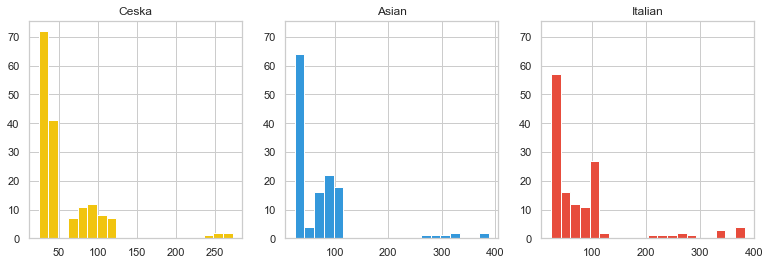

In [202]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,3,1)
plt.hist(cz, label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska')

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian, label='Asian', color='#3498db', bins=20)
plt.title('Asian')

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it, label='Italian', color='#e74c3c', bins=20)
plt.title('Italian')


Text(0.5, 1.0, 'Italian')

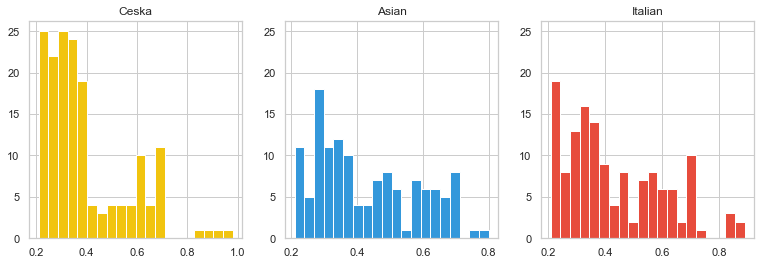

In [203]:
plt.figure(figsize=(13,4))
ax = plt.subplot(1,3,1)
plt.hist(cz_q, label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska')

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian_q, label='Asian', color='#3498db', bins=20)
plt.title('Asian')

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it_q, label='Italian', color='#e74c3c', bins=20)
plt.title('Italian')

In [204]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,50.0,44.0,0.38
Czech cuisine,55.0,39.0,0.34
Italian cuisine,53.0,44.0,0.37


# Favourite category

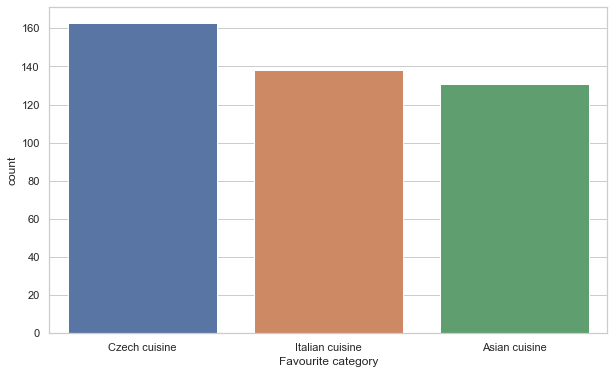

In [206]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
fav = demography.value_counts('Favourite category')
fav = pd.DataFrame(fav).rename(columns={0:'count'})
fav.reset_index(inplace=True)
sns.barplot(x='Favourite category', y='count', data=fav);

# Ad Type

In [207]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          212
citylight                 61
print-on-bus              61
promo stand small         36
hostess on the street     30
billboard                 28
radio spot                 4
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [208]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

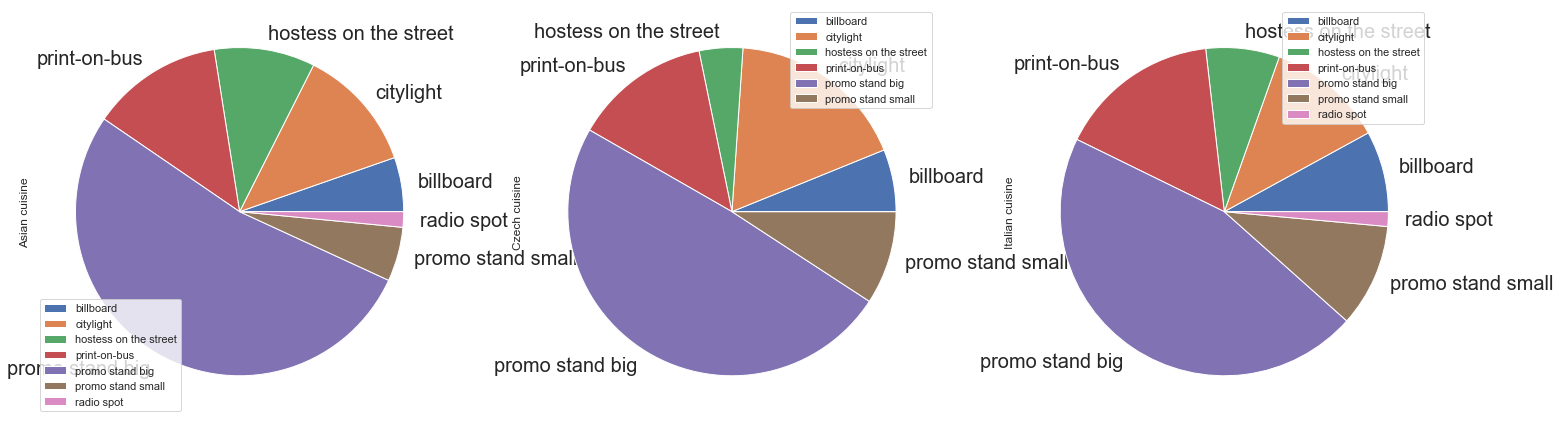

In [209]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [210]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [211]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [212]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

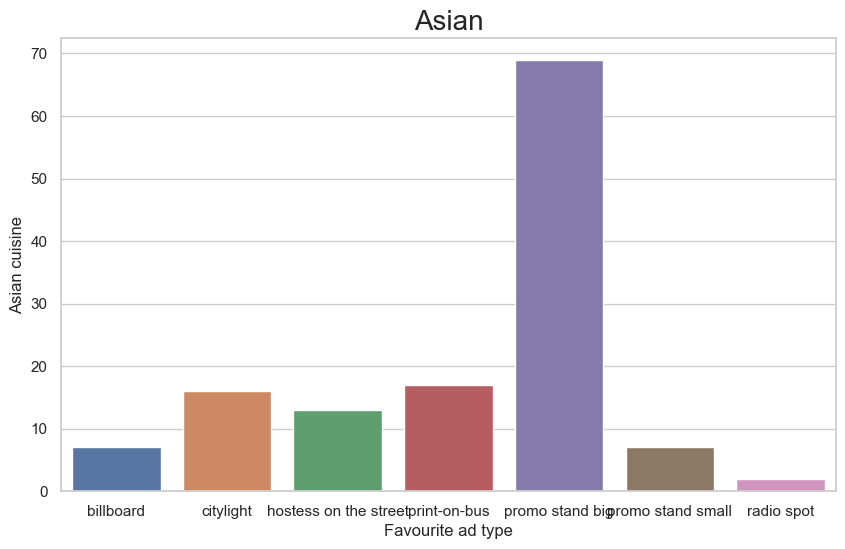

In [213]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

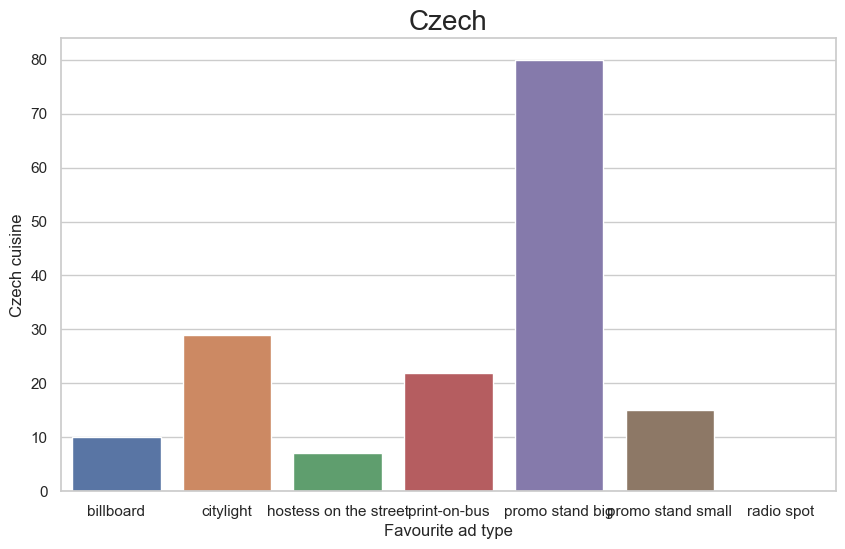

In [214]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

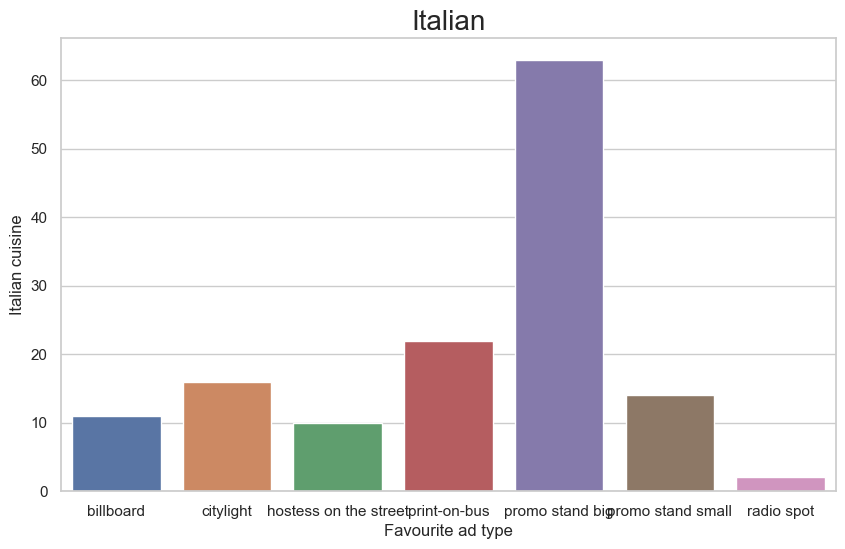

In [215]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

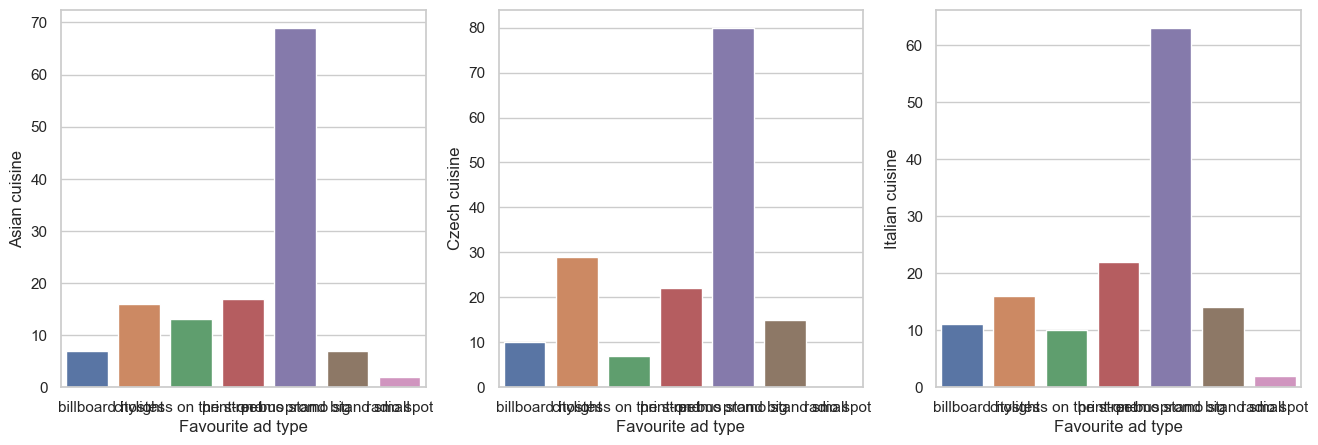

In [216]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [217]:
cuisine = demography['Favourite category'] == 'Czech cuisine'

In [218]:
ad = demography['Favourite ad type'] == 'promo stand big'

In [219]:
cz_df = demography[cuisine & ad]

In [220]:
top_locations = cz_df.describe(include='object')

In [221]:
top_locations.drop(['count', 'unique'], inplace=True)

In [222]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,29
5,MON 8-16h,Industrial district,34
6,MON 16-24h,Housing district,59
7,TUE 0-8h,Industrial district,27
8,TUE 8-16h,Industrial district,30
9,TUE 16-24h,Housing district,54
10,WED 0-8h,Industrial district,28
11,WED 8-16h,Industrial district,29
12,WED 16-24h,Housing district,35
13,THU 0-8h,Outskirts,29


In [223]:
metriki = cz_df.describe()

In [224]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,52.612500,50.00
Weekly income,55.237500,41.00
Preferred quality,0.393375,0.35


# WIP

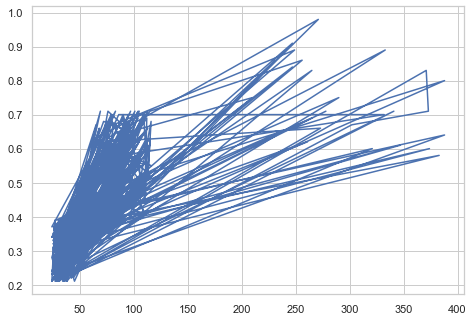

In [225]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [226]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine        131    119  CC    3    131      2  Female   68   
Czech cuisine        163    134  ZP    3    163      2    Male   88   
Italian cuisine      137    119  JJ    3    138      2  Female   81   

                   Favourite ad type         ...             SUN 0-8h       \
                               count unique  ...                  top freq   
Favourite category                           ...                             
Asian cuisine                    131      7  ...      Office district   34   
Czech cuisine                    163      6  ...  Industrial district   62   
Italian cuisine                  138      7  ...            Outskirts   38   

                   SUN 8-16h                                  SUN 16-24h  \
                       count unique                  top freq      count   
Favourite category                                                         
Asian cuisine            131      5            Outskirts   40        131   
Czech cuisine            163      5            Outskirts   61        163   
Italian cuisine          138      5  Industrial district   37        138   

                                                  
                   unique               top freq  
Favourite category                                
Asian cuisine           4  Housing district   95  
Czech cuisine           4  Housing district  137  
Italian cuisine         5  Housing district  103  

[3 rows x 96 columns]